In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as sm
import numpy as np


In [45]:
veri=pd.read_excel("C:/Users/HP/Documents/Serpil Veri Bilimi/Zaman Serileri/EVDS.xlSx")
print(veri.dtypes)
tarihler=pd.date_range("2003",periods=len(veri["Tarih"]),freq="Q")
veri["Tarih"]=tarihler
veri.head()
veri=veri.drop(veri.index[84:95])
veri=veri.drop("Unnamed: 2", axis=1)
veri=veri.rename(columns={"TP SGEGI K1":"Gelir"})
veri["Gelir"] = veri.Gelir.astype(float)
veri.head()
veri.tail(20)



Tarih          object
TP SGEGI K1    object
Unnamed: 2     object
dtype: object


,Tarih,Gelir
64,2019-03-31,1485.666667
65,2019-06-30,2731.666667
66,2019-09-30,4614.000000
67,2019-12-31,2603.666667
68,2020-03-31,1389.000000
69,2020-06-30,791.000000
70,2020-09-30,1510.333333
71,2020-12-31,1280.333333
72,2021-03-31,815.666667
73,2021-06-30,1257.666667


In [28]:
veri.set_index("Tarih", inplace=True)
print(veri)

,Gelir
Tarih,
2003-03-31,402
2003-06-30,759
2003-09-30,2360
2003-12-31,911.666667
2004-03-31,578.333333
...,...
2022-12-31,3370
2023-03-31,2536
2023-06-30,3784.333333


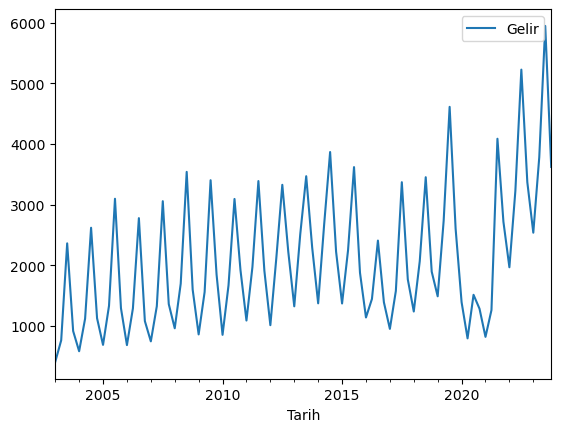

In [33]:
veri.plot()
plt.show()

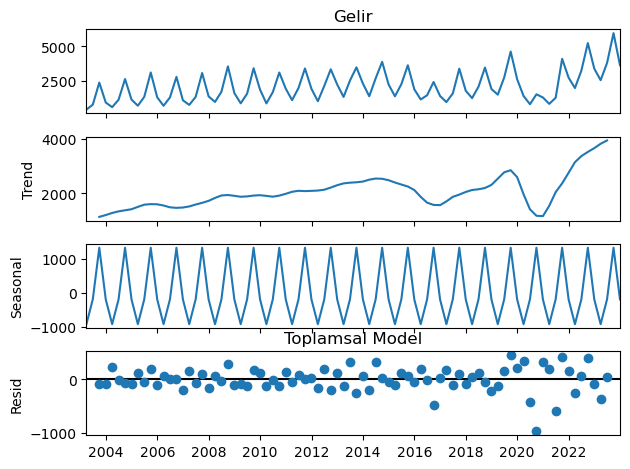

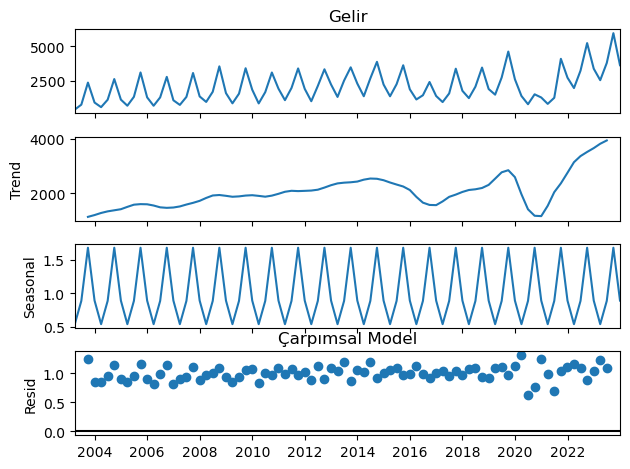

In [38]:
ayristirma=sm(veri["Gelir"],model="add",period=4)
ayristirma.plot()
plt.title("Toplamsal Model")
plt.show()

ayristirma2=sm(veri["Gelir"],model="mul",period=4)
ayristirma2.plot()
plt.title( "Çarpımsal Model")
plt.show()


In [41]:
print(np.std(ayristirma.resid))
print(np.std(ayristirma2.resid))

221.58312492889186
0.12318437250157324


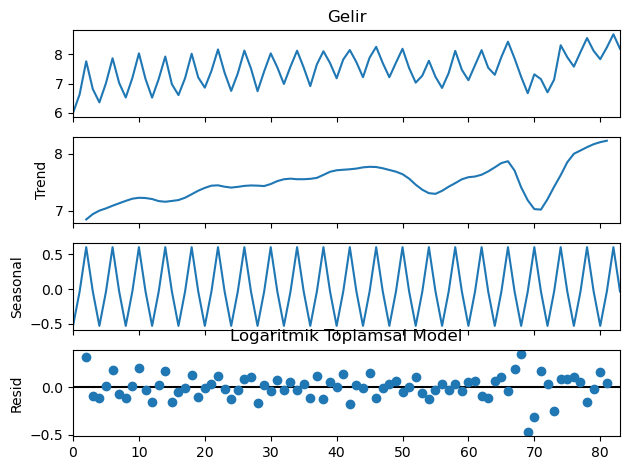

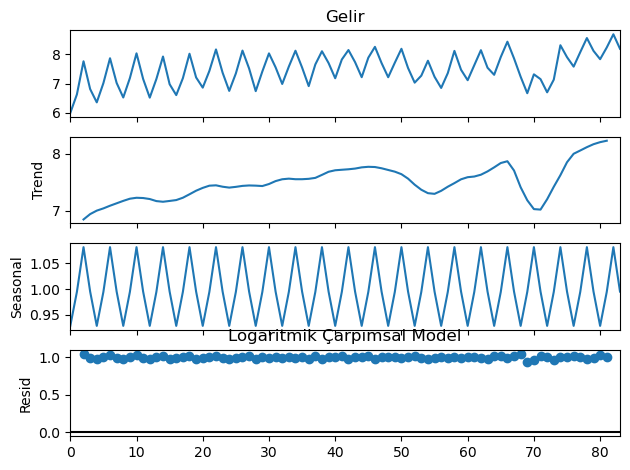

In [46]:
ayristirma3=sm(np.log(veri["Gelir"]),model="add",period=4)
ayristirma3.plot()
plt.title("Logaritmik Toplamsal Model")
plt.show()

ayristirma4=sm(np.log(veri["Gelir"]),model="mul",period=4)
ayristirma4.plot()
plt.title("Logaritmik Çarpımsal Model")
plt.show()

In [47]:
print(np.std(ayristirma3.resid))
print(np.std(ayristirma4.resid))

0.12764526960858213
0.01818414664560775


In [48]:
ayristirma4.trend

0          NaN
1          NaN
2     6.847999
3     6.941724
4     7.002939
        ...   
79    8.170447
80    8.206548
81    8.231712
82         NaN
83         NaN
Name: trend, Length: 84, dtype: float64

: 

Log Çarpımsal Modelde trend yapısının içindeki gürültüyü daha iyi şekilde ayrıştırabildiğimiz ve normallik varsayımına yakınsayabildiğimiz için en iyi sonucu alıyoruz.